In [1]:
import statsmodels.api as sm

missingno 패키지: 결측 데이터 검색

sklearn.impute 패키지: 결측 데이터 대체

patsy 패키지: 데이터 선택, 변환, 추가, 스케일링

sklearn.preprocessing 패키지: 스케일링, 변환



In [1]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [2]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [3]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

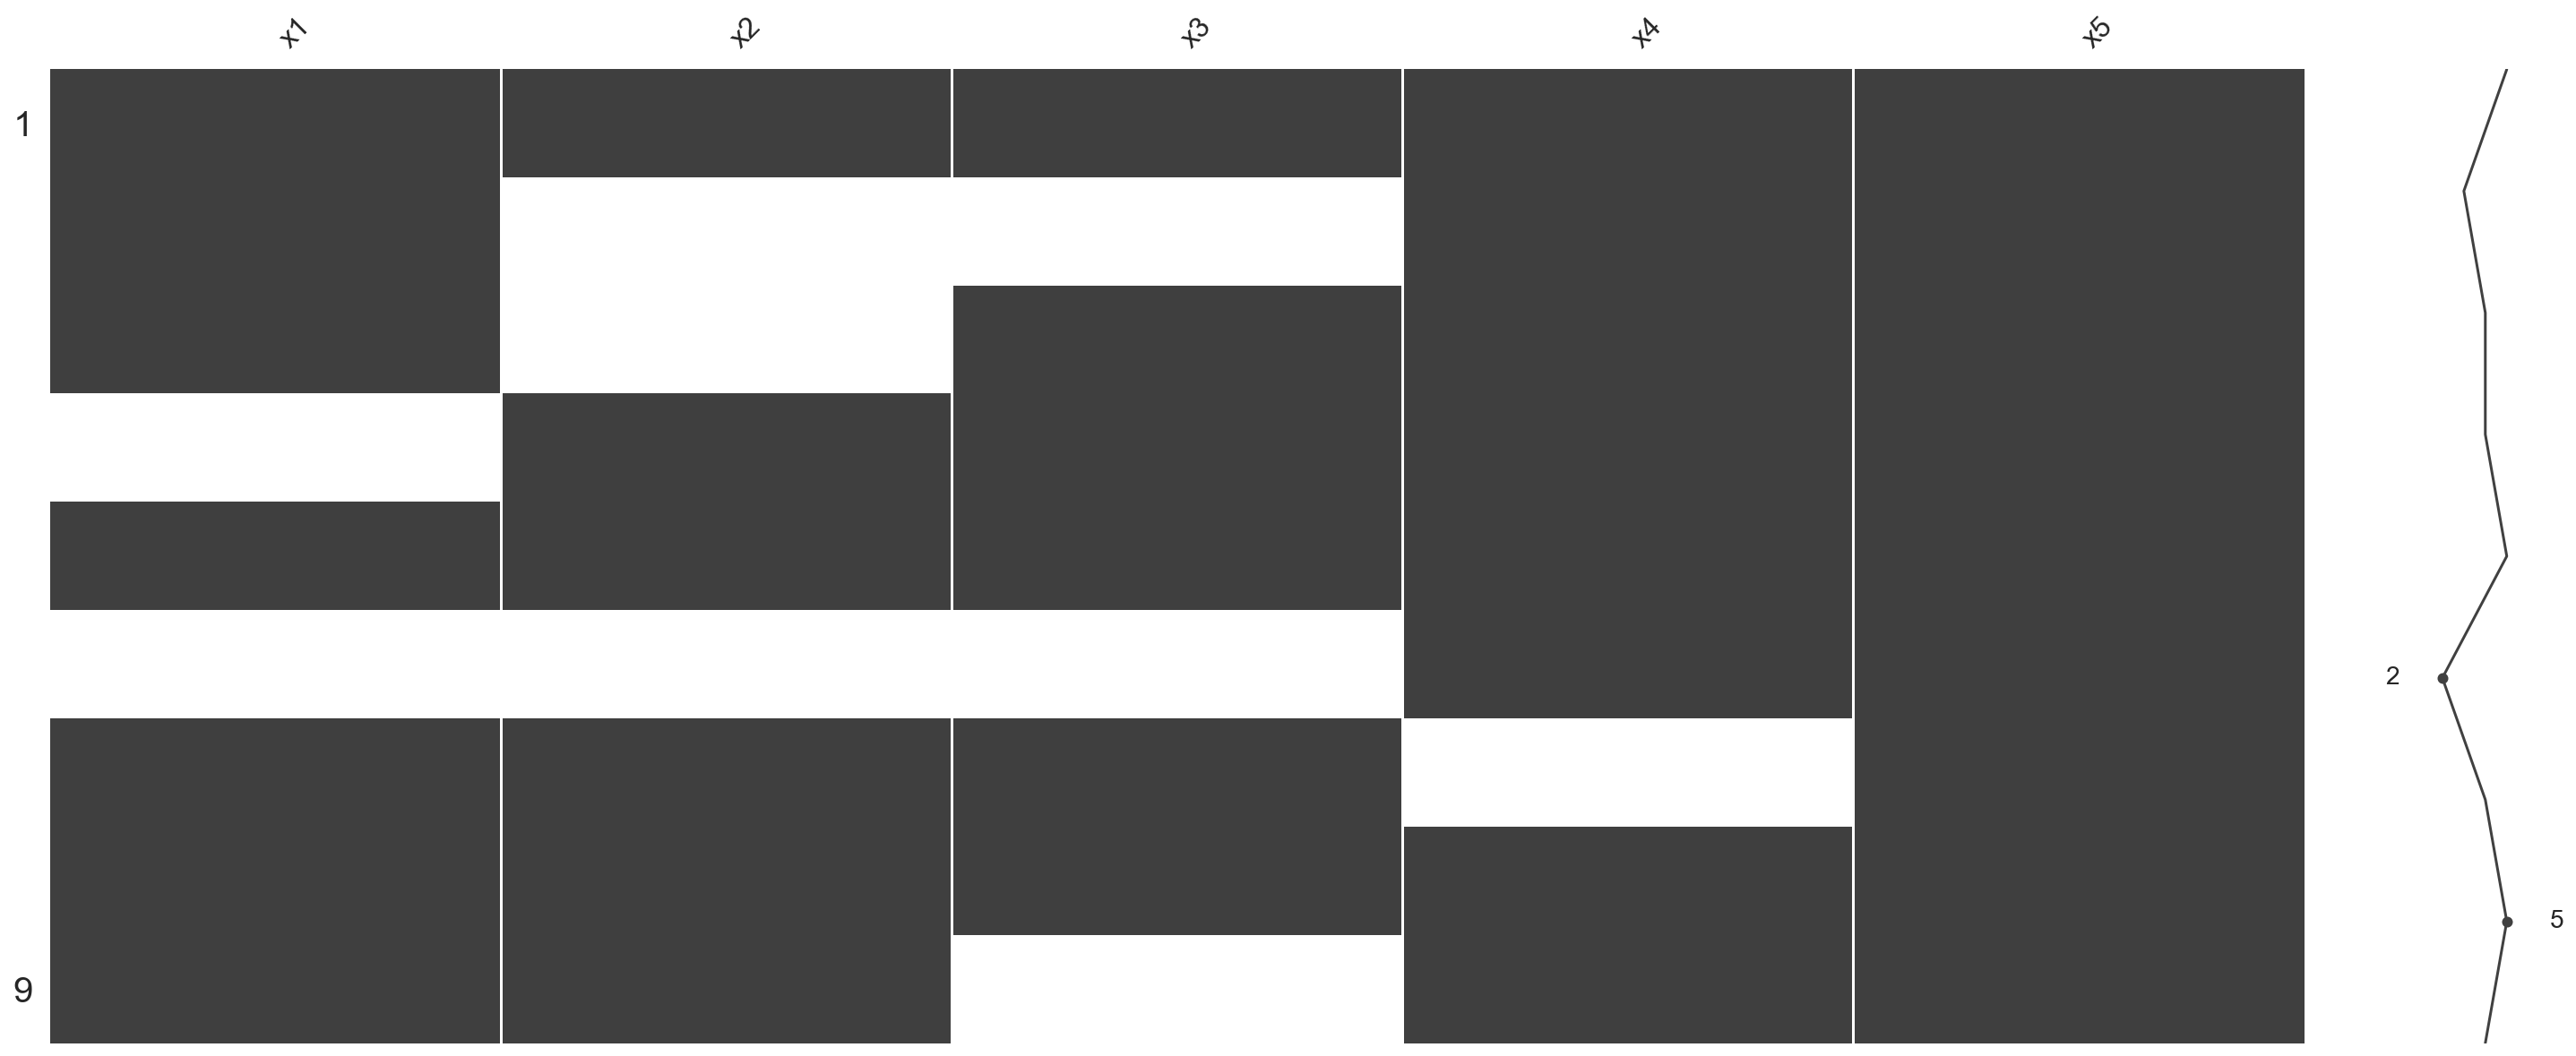

In [8]:
import missingno as msno

msno.matrix(df)
plt.show()
%matplotlib inline

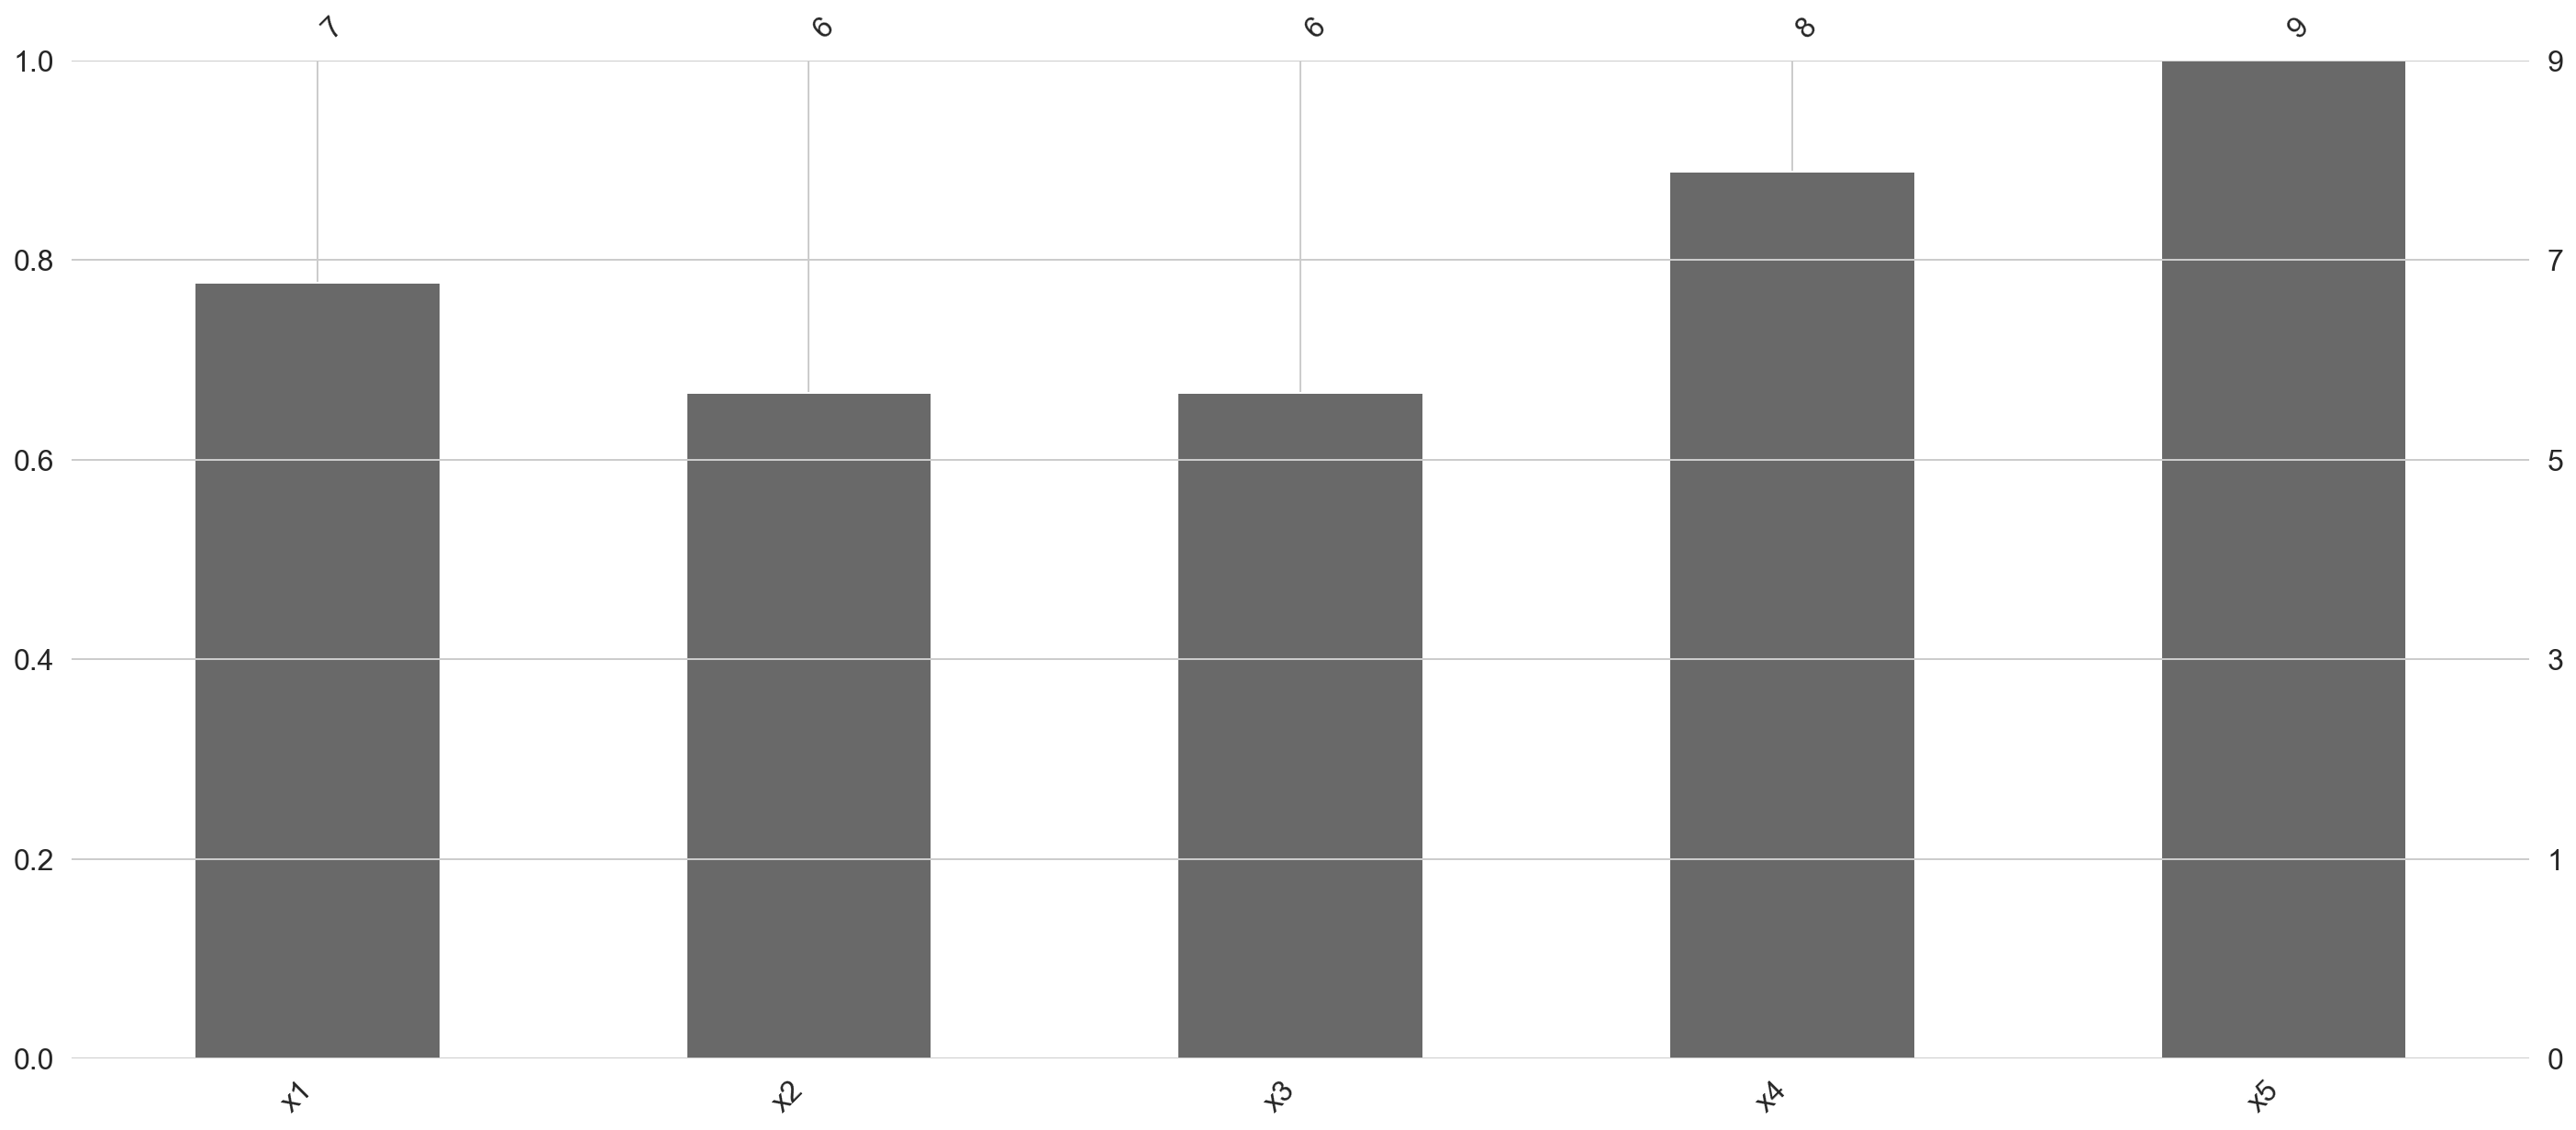

In [9]:
msno.bar(df)
plt.show()

In [10]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


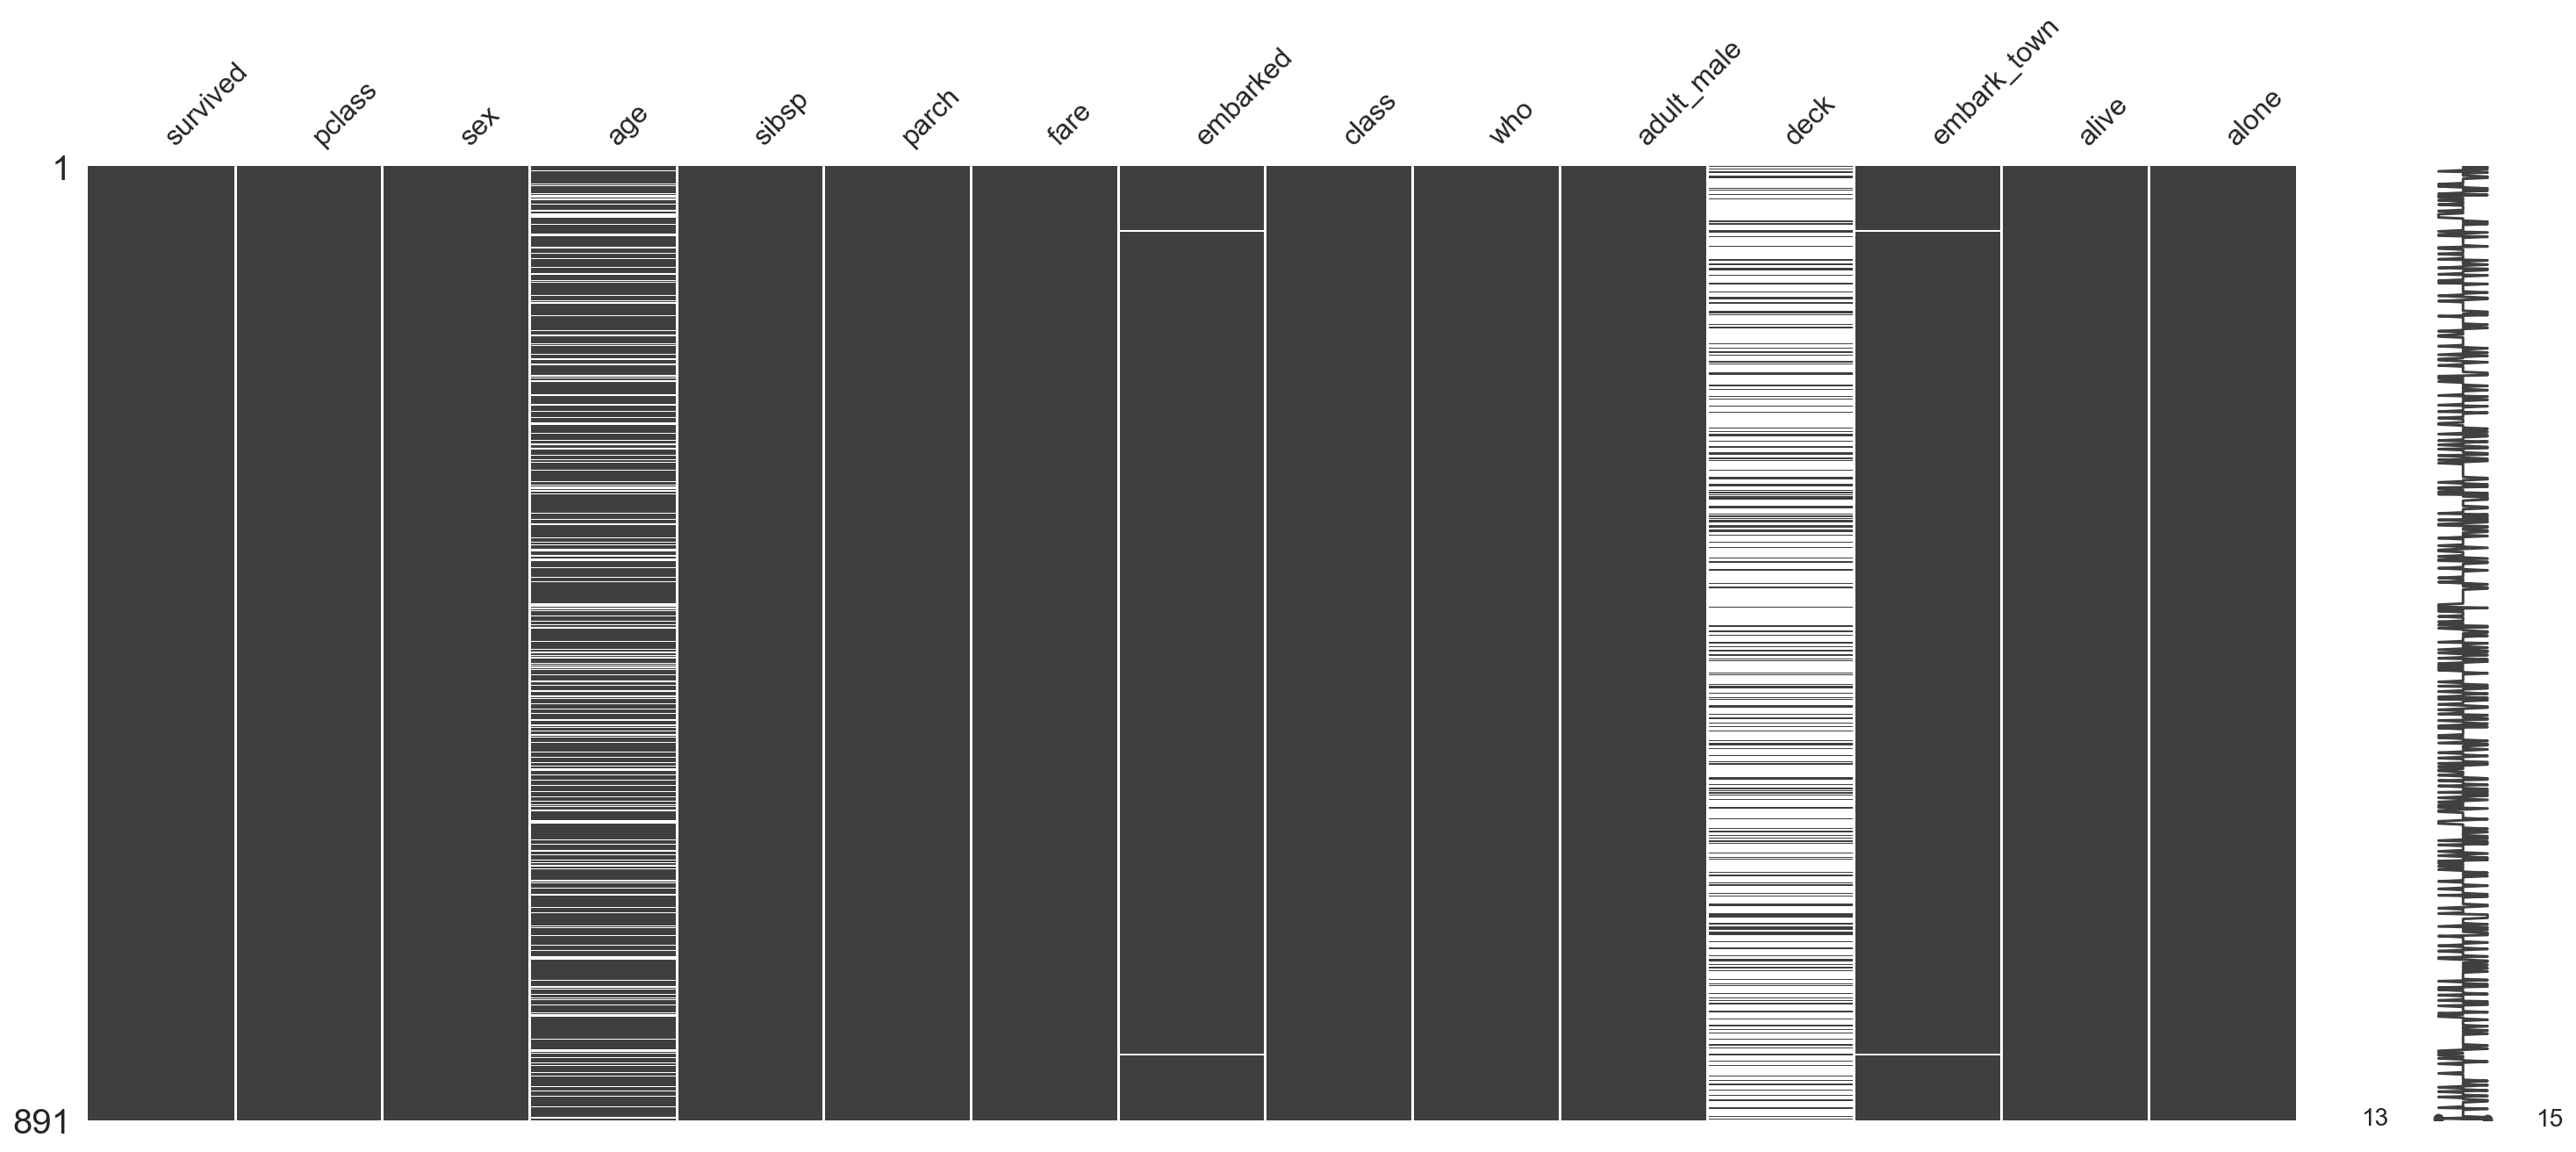

In [12]:
msno.matrix(titanic)
plt.show()

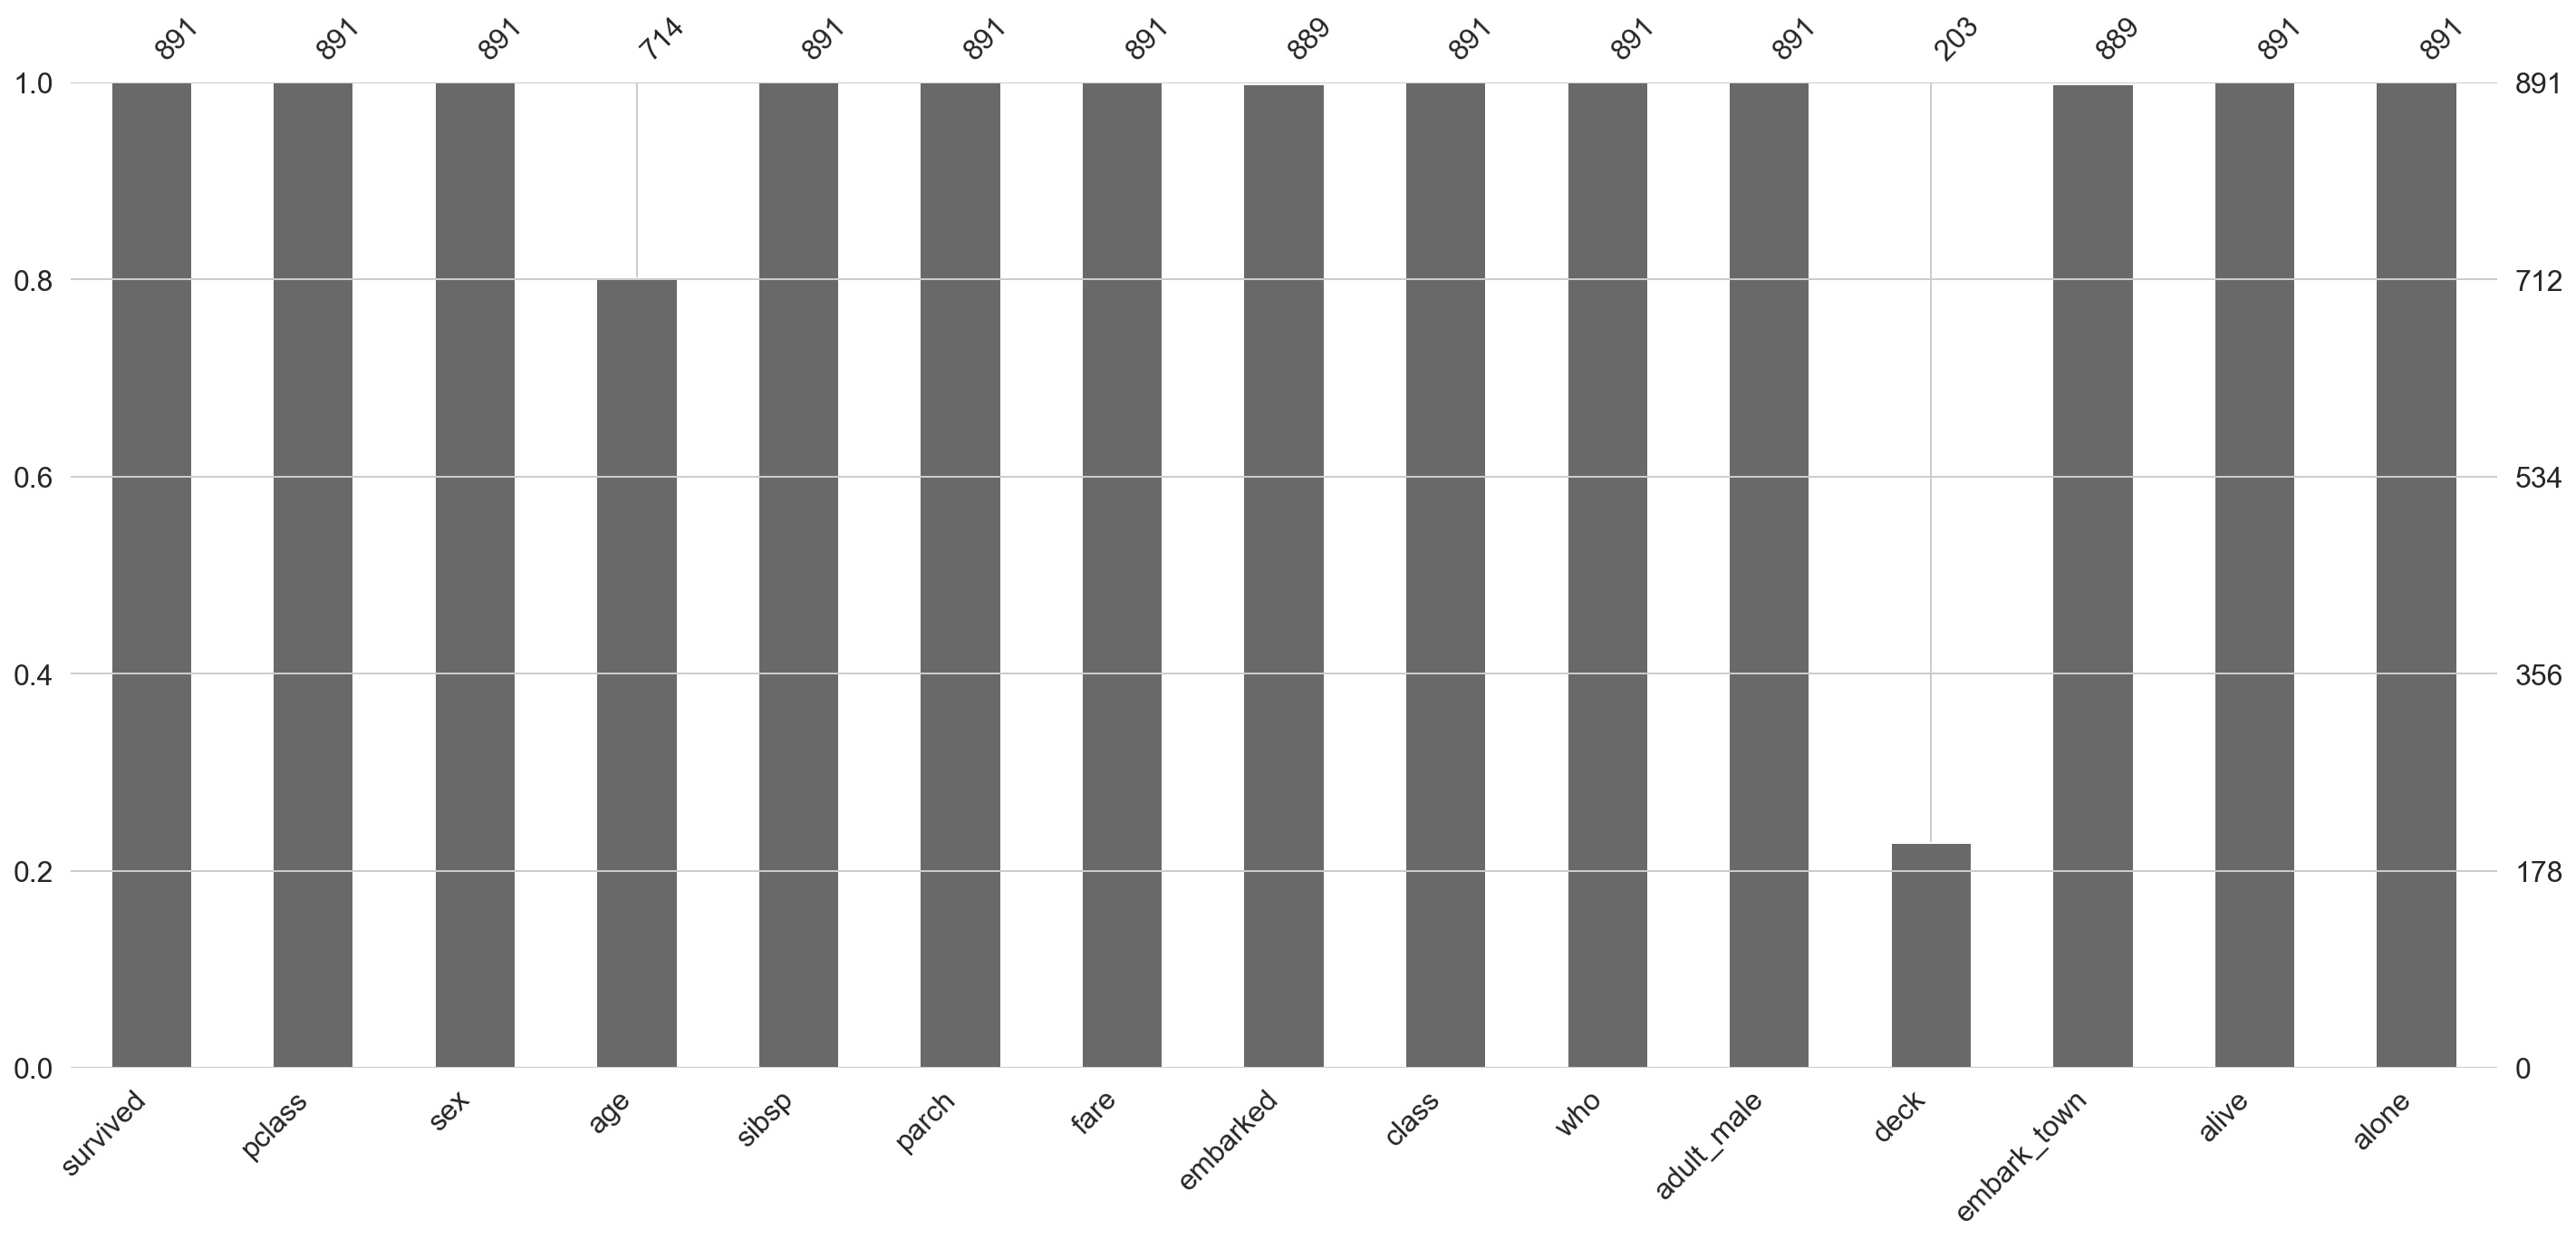

In [13]:
msno.bar(titanic)

In [14]:
df.dropna() # 행으로지운다

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [15]:
df.dropna(axis = 1) # 열로 지운다

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [26]:
df.dropna(thresh=7, axis = 1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


# 데이터의 양이 50 이상 손실된 컬럼 삭제

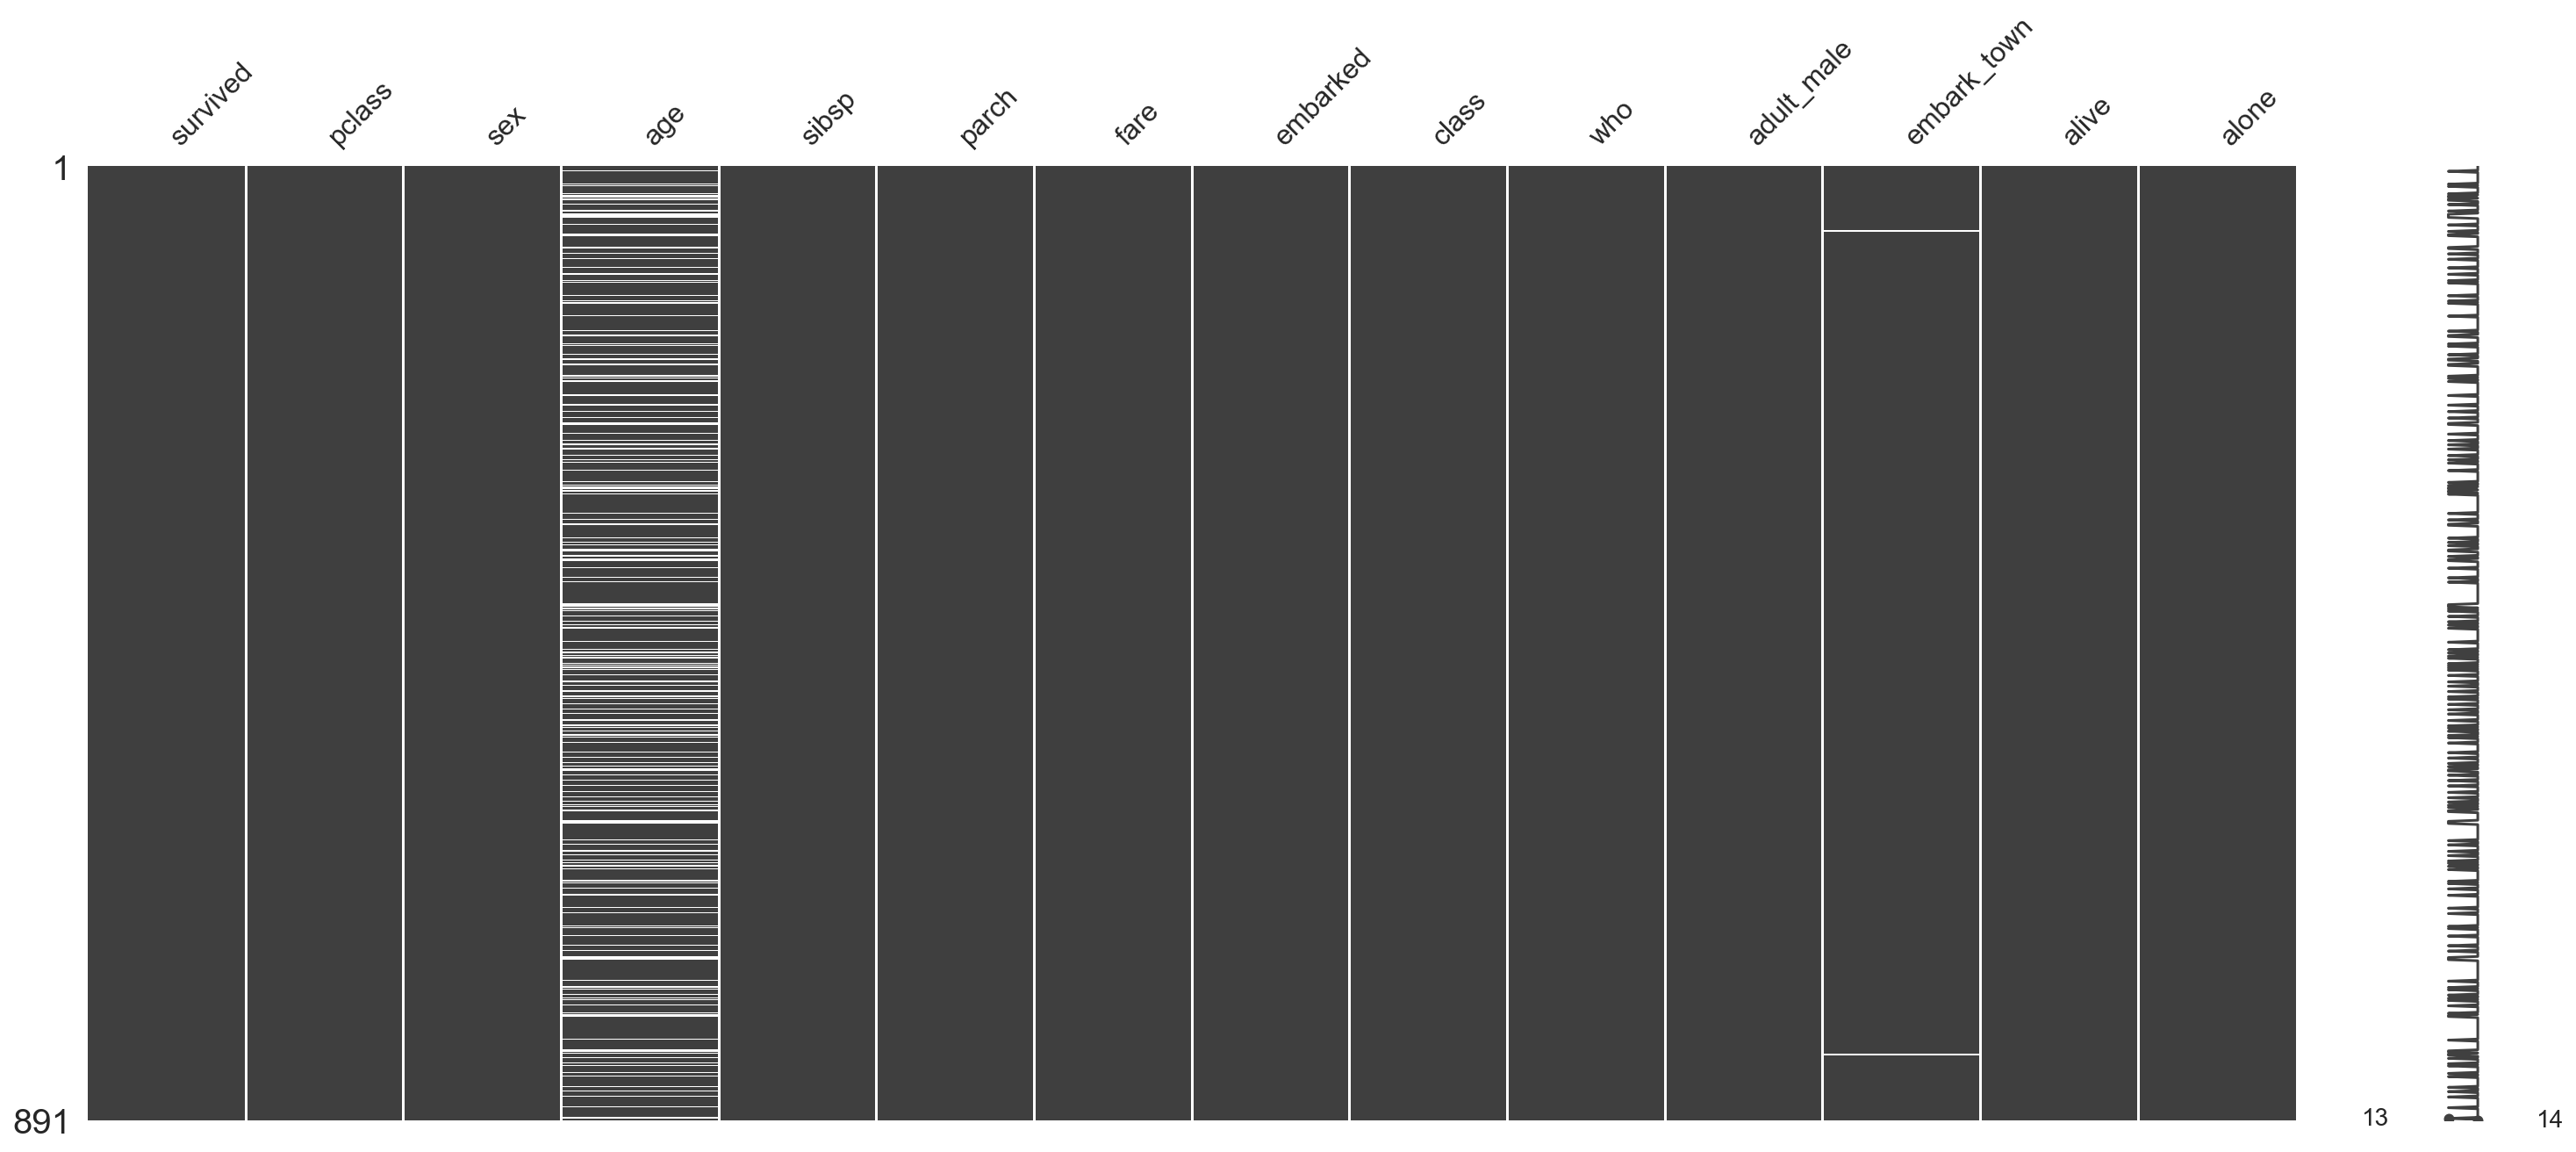

In [51]:
tita_df = titanic.dropna(thresh = int(len(titanic)*0.5), axis = 1)
msno.matrix(tita_df)

In [41]:
from sklearn.impute import SimpleImputer

In [28]:

imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [29]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [54]:
tita_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [55]:
tita_df.embark_town

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

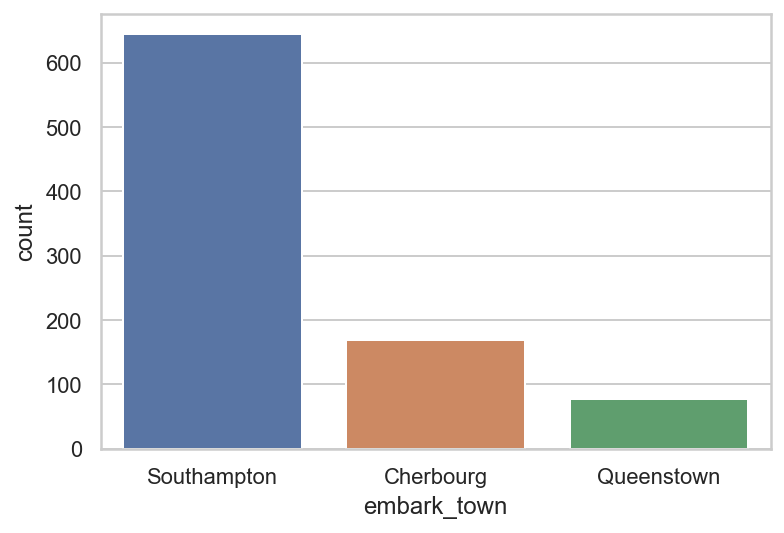

In [56]:
sns.countplot(tita_df.embark_town)

In [66]:
em_impute = SimpleImputer(strategy="most_frequent")
tita_df["embarked"] = em_impute.fit_transform(tita_df[["embarked"]])
tita_df["embark_town"] = em_impute.fit_transform(tita_df[["embark_town"]])

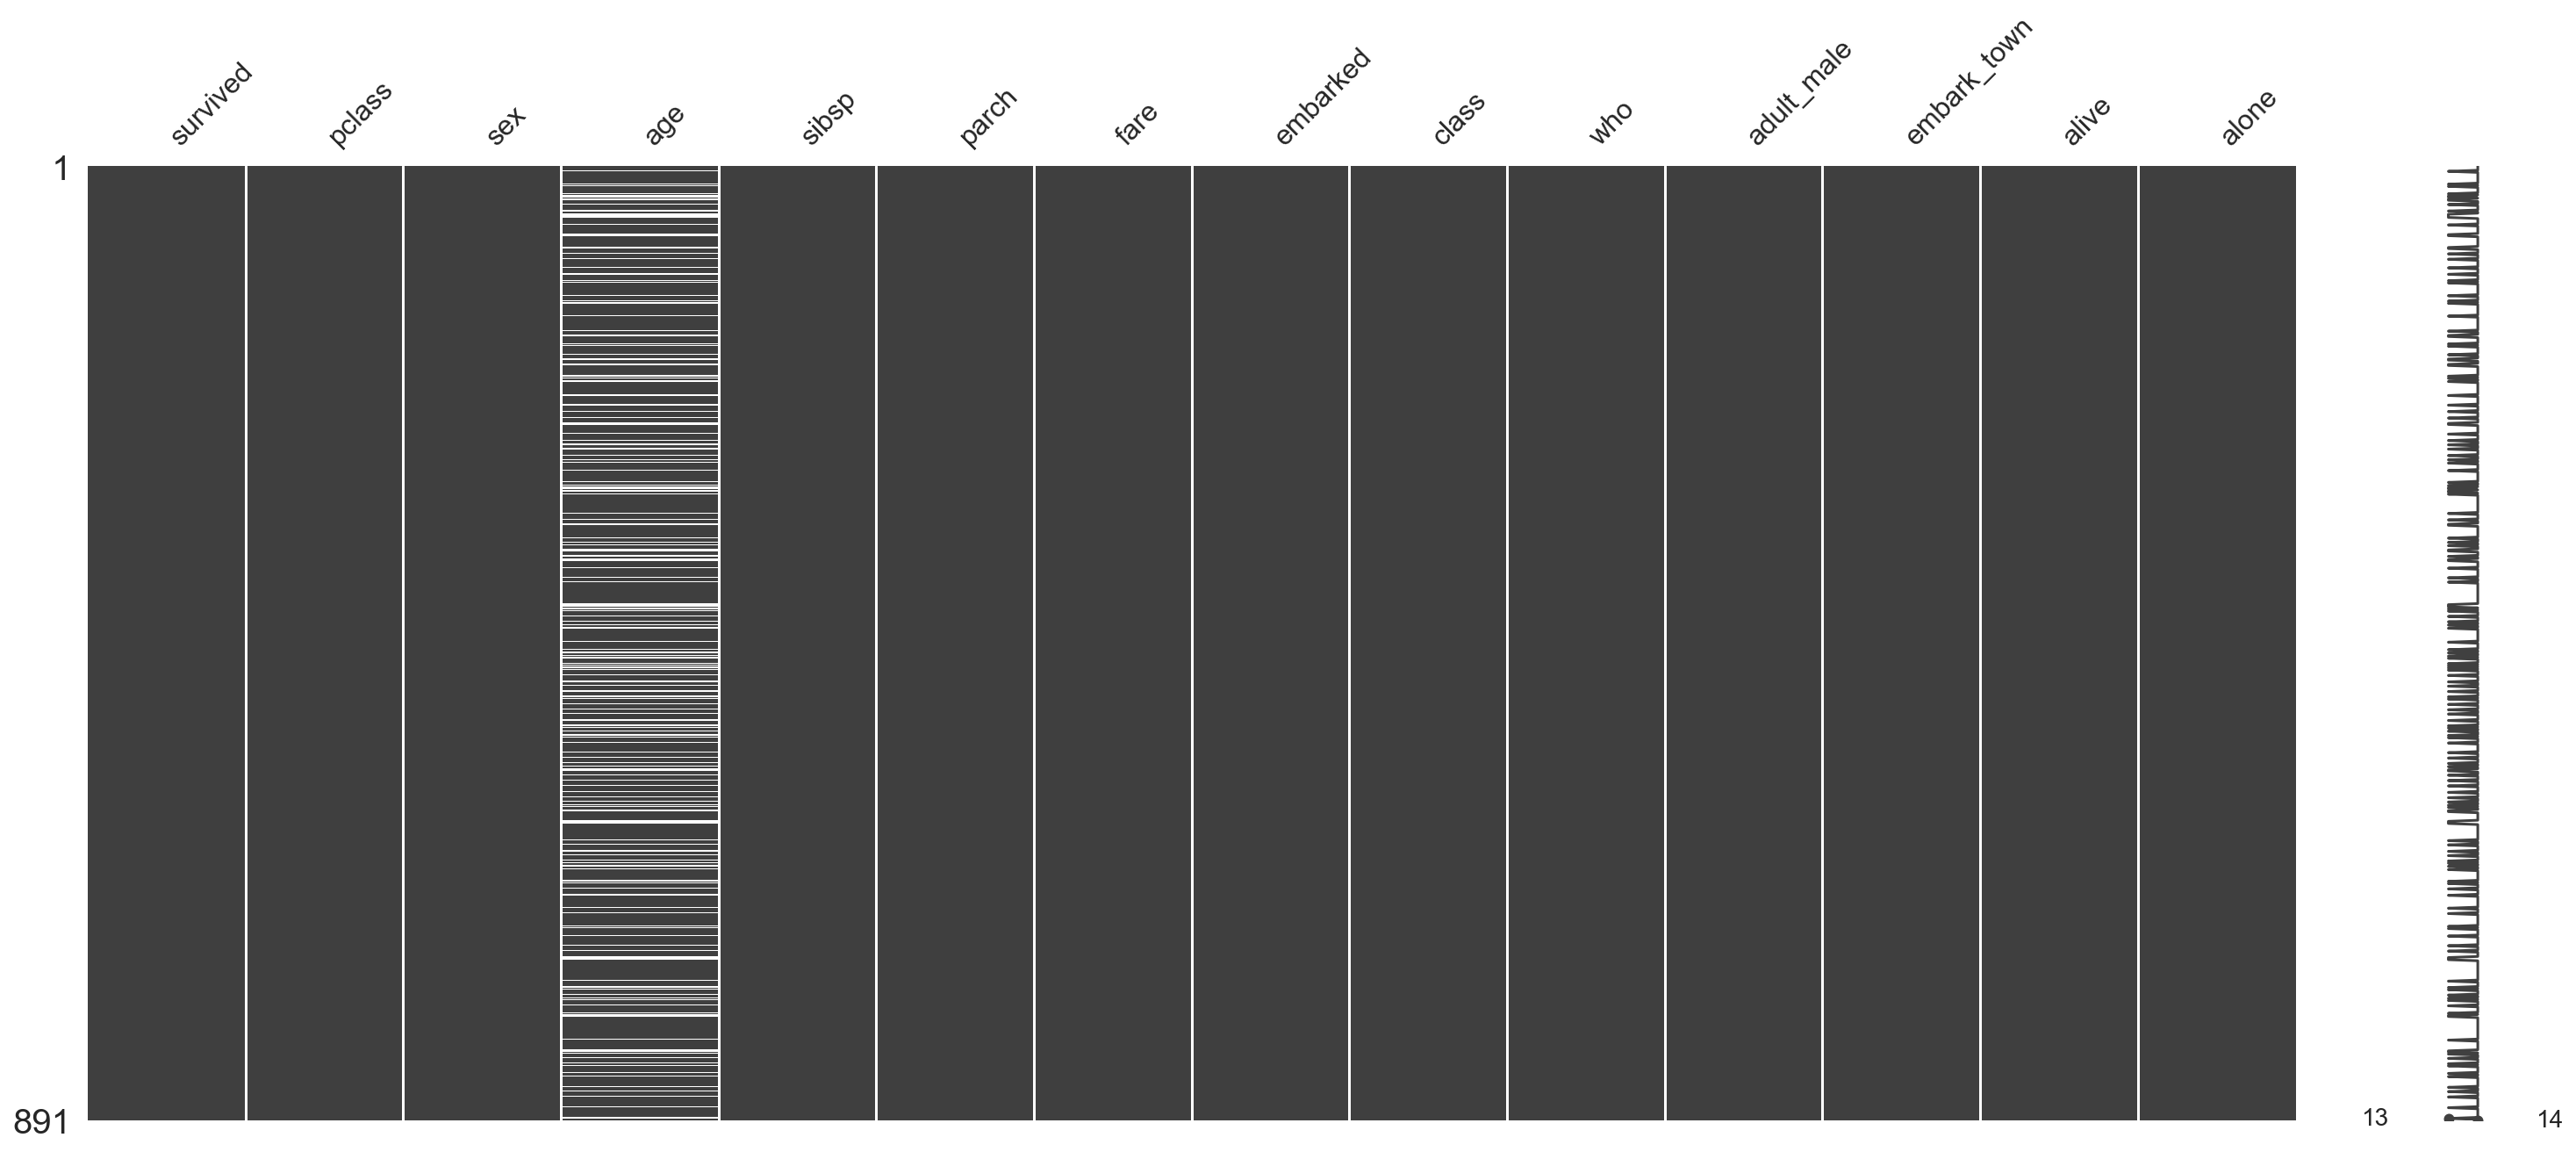

In [67]:
msno.matrix(tita_df)

실수값에서는 최빈값으로 채워넣으면 안된다ㅡ

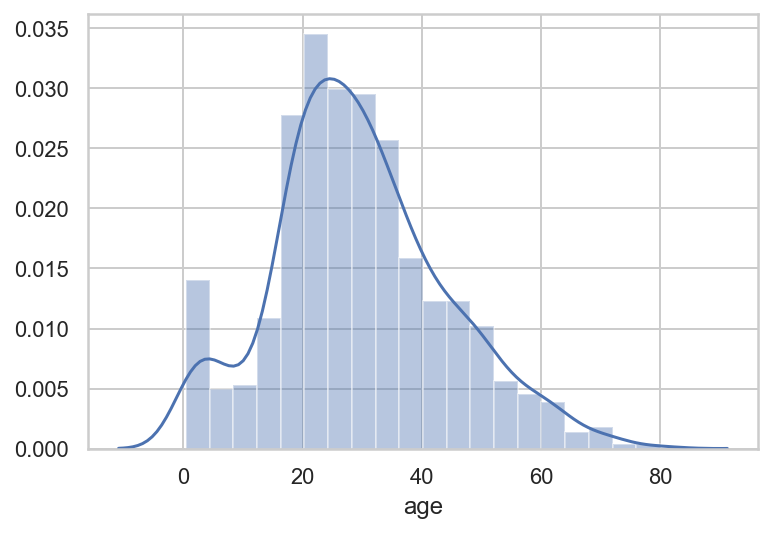

In [71]:
sns.distplot(tita_df.age)

In [75]:
tita_age_impute = SimpleImputer(strategy="median")
tita_df["age"] = tita_age_impute.fit_transform(tita_df[["age"]])

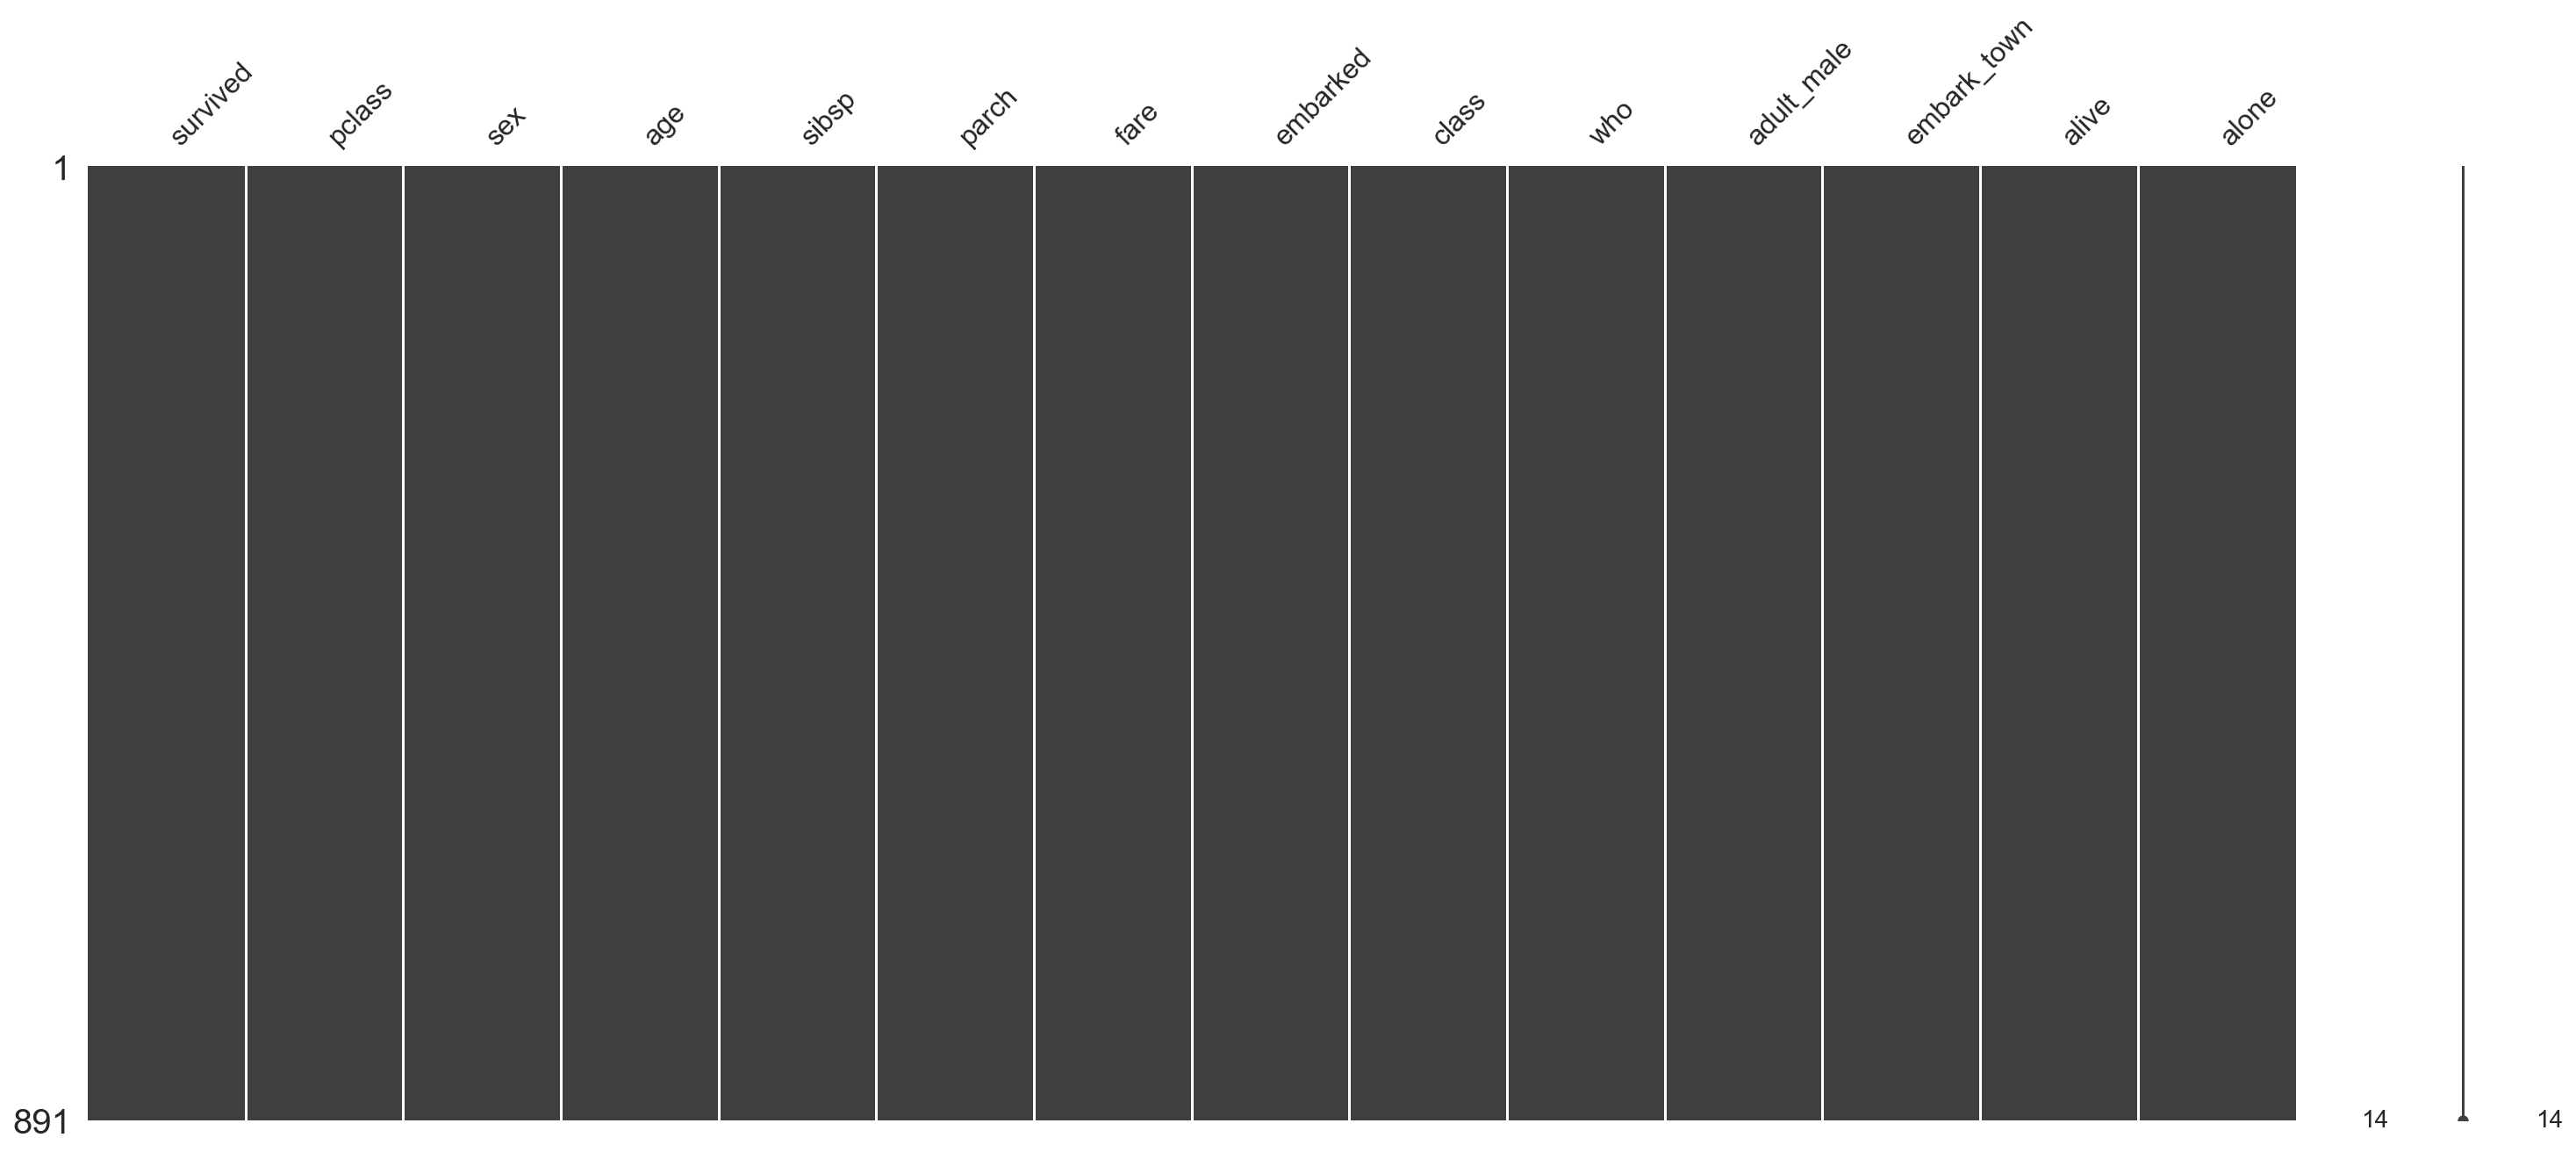

In [76]:
msno.matrix(tita_df) 

# 제일 중요한 전처리 패키지 = patsy

In [77]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [78]:
tita_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [84]:
# design matrix
from patsy import dmatrix
tita_patsy = dmatrix("survived+pclass+  age+0", data = tita_df)
tita_patsy

DesignMatrix with shape (891, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       3   28
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         1       2   28
         0       3   31
         1       3   28
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       3   28
         0       1   19
         1       3   28
         0       3   28
  [861 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [87]:
data = np.array([[0], [1], [2], [3], [4], [5]])
data

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [93]:
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [98]:
X1 = np.vstack([X, [[1000], [2000]]])
X1

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000],
       [2000]])

In [100]:
scaler.transform(X1)

array([[-1.500e+00],
       [-1.000e+00],
       [-5.000e-01],
       [ 0.000e+00],
       [ 5.000e-01],
       [ 1.000e+00],
       [ 1.500e+00],
       [ 4.985e+02],
       [ 9.985e+02]])

In [106]:
df = pd.DataFrame([1, 2, 3, 4], columns = ["x"])
df

,x
0,1
1,2
2,3
3,4


In [107]:
dmatrix("C(x)+0", df)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)